# Emotion Detection from Text
> The dataset used is from Kaggle , You can find it <a href="https://www.kaggle.com/datasets/parulpandey/emotion-dataset">Here</a>

# We're going to Build and Train a Machine Learning Model so it's essential to view the Framework
<img src="https://i.pinimg.com/originals/cb/9d/b4/cb9db4db9b22f42dfc6b849fb3948bfe.png">

### Import the Essential Dependencies and Packages

In [33]:
## import packages to upload the dataset and perform analysis on 'em
import pandas as pd ## used mainly for EDA
import numpy as np ## used for mathematical operations in a fast way
## Packages used for Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx ## used for text cleaning

## Machine Learning Packages for Model Buiding and Predection
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

## our data is in pickle form
import pickle
## for saving the model
import joblib

In [2]:
## importing the data
with open("merged_training.pkl", "rb") as file:
    dt = pickle.load(file)
dt.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


# Performing EDA 

In [3]:
dt.shape

(416809, 2)

In [4]:
dt.emotions.value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

In [5]:
dt.duplicated().sum()

686

In [6]:
dt = dt.drop_duplicates()
dt.duplicated().sum()

0

In [7]:
dt.shape

(416123, 2)

In [8]:
dt.isna().sum()

text        0
emotions    0
dtype: int64

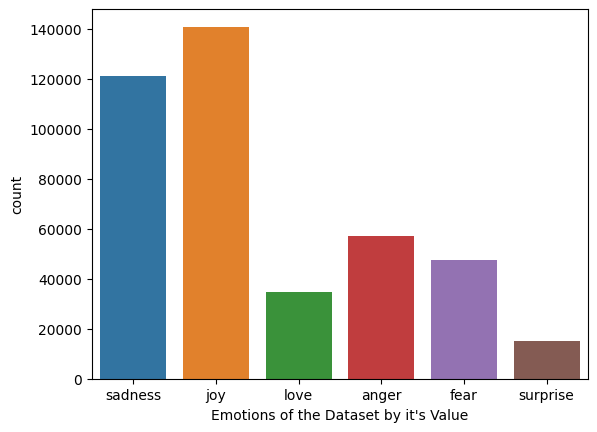

In [9]:
sns.countplot(data=dt, x='emotions')
plt.xlabel("Emotions of the Dataset by it's Value")
plt.show()

In [16]:
## now we need to perform two steps 
#   + text cleaning + remove stop words ==> neattext package will do this
dt["clean_text"] = dt['text'].apply(nfx.remove_userhandles) ## that will clean the text properly
dt['clean_text'] = dt['clean_text'].apply(nfx.remove_stopwords) ## removing stopwords
## let's view the results
dt.head()

## ==> we can see clearly that clean_text column is just like a tag words and that's exactly what we need for classification

,text,emotions,clean_text
27383,i feel awful about it too because it s my job ...,sadness,feel awful job position succeed happen
110083,im alone i feel awful,sadness,im feel awful
140764,ive probably mentioned this before but i reall...,joy,ive probably mentioned feel proud actually kee...
100071,i was feeling a little low few days back,sadness,feeling little low days
2837,i beleive that i am much more sensitive to oth...,love,beleive sensitive peoples feelings tend compas...


## The Spicy part Now.. time to create a Machine Learning Model and train it

In [17]:
X = dt.clean_text ## the features
y = dt.emotions ## the labels

In [19]:
## 0.33 : 0.67 [training:testing]
## that line specify Model's Architecture
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) ## we don't need to specify special hyperparameters so will keep it as default

In [21]:
## Without digginf into too much details but creating a Pipeline is essential here to try both the CountVectorizer and Linear Regression
pipeline = Pipeline(
    steps= [
        ("cv", CountVectorizer()), ("lr", LogisticRegression())
    ]
)
## fit and train the model
pipeline.fit(X_train, y_train)

c:\Users\omarm\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [27]:
## show the Accuracy now before applying the Confusion Matrix
print(f"The Accuracy have reached {round(pipeline.score(X_test, y_test), 2) * 100} %" )

The Accuracy have reached 89.0 %


In [30]:
## make a check
test = "I'm absolutely sad" ## should be classified as sadness
pipeline.predict([test]) ## great job

array(['sadness'], dtype=object)

In [32]:
pipeline.classes_ ## that's all amotions available for now

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

## Save the Model

In [34]:
with open("Emotions_classification_model.pkl", "wb") as model_:
    joblib.dump(pipeline, model_)

## Examination Now

In [37]:
model = joblib.load(open("Emotions_classification_model.pkl", "rb"))

In [43]:
print((model.predict(["I'm very happy"])[0])) ## ok it wokrs Well .. time to imigrate to the main Assistant File :)

joy
